# EDA

## Data overview

Import Libraries

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

Load Dataset

In [68]:
data=pd.read_csv("ottdata.csv")
data.head()

,visitors,ad_impressions,major_sports_event,genre,dayofweek,season,views_trailer,views_content
0,1.67,1113.81,0,Horror,Wednesday,Spring,56.70,0.51
1,1.46,1498.41,1,Thriller,Friday,Fall,52.69,0.32
2,1.47,1079.19,1,Thriller,Wednesday,Fall,48.74,0.39
3,1.85,1342.77,1,Sci-Fi,Friday,Fall,49.81,0.44
4,1.46,1498.41,0,Sci-Fi,Sunday,Winter,55.83,0.46


In [69]:
data.tail()

,visitors,ad_impressions,major_sports_event,genre,dayofweek,season,views_trailer,views_content
995,1.58,1311.96,0,Romance,Friday,Fall,48.58,0.36
996,1.34,1329.48,0,Action,Friday,Summer,72.42,0.56
997,1.62,1359.80,1,Sci-Fi,Wednesday,Fall,150.44,0.66
998,2.06,1698.35,0,Romance,Monday,Summer,48.72,0.47
999,1.36,1140.23,0,Comedy,Saturday,Summer,52.94,0.49


In [70]:
print("Structure of the data:")
print(data.head())  #First 5 rows
print("\nColumn Names:")
print(data.columns) 
print("\nData Shape:")
print("Number of rows = ",data.shape[0])
print("Number of columns = ",data.shape[1])

Structure of the data:
   visitors  ad_impressions  major_sports_event     genre  dayofweek  season  \
0      1.67         1113.81                   0    Horror  Wednesday  Spring   
1      1.46         1498.41                   1  Thriller     Friday    Fall   
2      1.47         1079.19                   1  Thriller  Wednesday    Fall   
3      1.85         1342.77                   1    Sci-Fi     Friday    Fall   
4      1.46         1498.41                   0    Sci-Fi     Sunday  Winter   

   views_trailer  views_content  
0          56.70           0.51  
1          52.69           0.32  
2          48.74           0.39  
3          49.81           0.44  
4          55.83           0.46  

Column Names:
Index(['visitors', 'ad_impressions', 'major_sports_event', 'genre',
       'dayofweek', 'season', 'views_trailer', 'views_content'],
      dtype='object')

Data Shape:
Number of rows =  1000
Number of columns =  8


In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   visitors            1000 non-null   float64
 1   ad_impressions      1000 non-null   float64
 2   major_sports_event  1000 non-null   int64  
 3   genre               1000 non-null   object 
 4   dayofweek           1000 non-null   object 
 5   season              1000 non-null   object 
 6   views_trailer       1000 non-null   float64
 7   views_content       1000 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 62.6+ KB


In [72]:
print("Statistical Summary")
data.describe()

Statistical Summary


,visitors,ad_impressions,major_sports_event,views_trailer,views_content
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,1.704290,1434.712290,0.400000,66.91559,0.473400
std,0.231973,289.534834,0.490143,35.00108,0.105914
min,1.250000,1010.870000,0.000000,30.08000,0.220000
25%,1.550000,1210.330000,0.000000,50.94750,0.400000
50%,1.700000,1383.580000,0.000000,53.96000,0.450000
75%,1.830000,1623.670000,1.000000,57.75500,0.520000
max,2.340000,2424.200000,1.000000,199.92000,0.890000


In [73]:
for col in data.select_dtypes(include='object').columns:
    print(f"Unique values in {col}: {data[col].unique()}")

Unique values in genre: ['Horror' 'Thriller' 'Sci-Fi' 'Others' 'Drama' 'Action' 'Comedy' 'Romance']
Unique values in dayofweek: ['Wednesday' 'Friday' 'Sunday' 'Thursday' 'Monday' 'Saturday' 'Tuesday']
Unique values in season: ['Spring' 'Fall' 'Winter' 'Summer']


In [74]:
print(data.genre.value_counts())
print(data.dayofweek.value_counts())
print(data.season.value_counts())

genre
Others      255
Comedy      114
Thriller    113
Drama       109
Romance     105
Sci-Fi      102
Horror      101
Action      101
Name: count, dtype: int64
dayofweek
Friday       369
Wednesday    332
Thursday      97
Saturday      88
Sunday        67
Monday        24
Tuesday       23
Name: count, dtype: int64
season
Winter    257
Fall      252
Spring    247
Summer    244
Name: count, dtype: int64


## Univariate Analysis

Numerical Variables

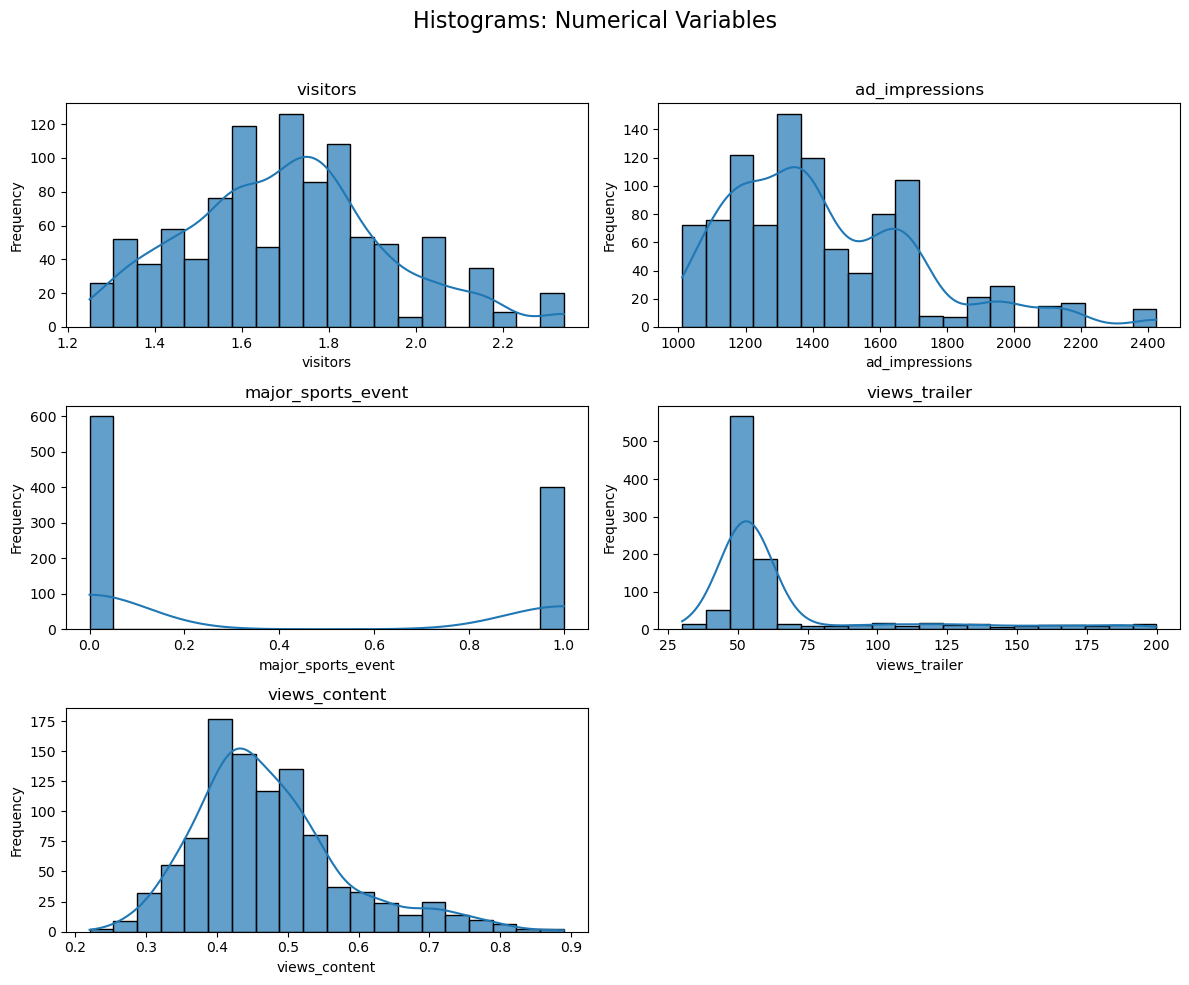

In [77]:
numerical_columns = data.select_dtypes(include='number').columns
num_plots = min(5, len(numerical_columns))
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
axes = axes.flatten()
for i in range(num_plots):
    col = numerical_columns[i]
    sns.histplot(data[col], kde=True, bins=20, alpha=0.7, ax=axes[i])
    axes[i].set_title(f"{col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")
for i in range(num_plots, len(axes)):
    fig.delaxes(axes[i])

plt.suptitle("Histograms: Numerical Variables", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [78]:
skewness = data[numerical_columns].skew()
numerical_columns = data.select_dtypes(include='number').columns
print("Skewness of Numerical Variables:")
print(skewness)

Skewness of Numerical Variables:
visitors              0.370598
ad_impressions        1.033562
major_sports_event    0.408862
views_trailer         2.372911
views_content         0.942847
dtype: float64


Categorical Variables

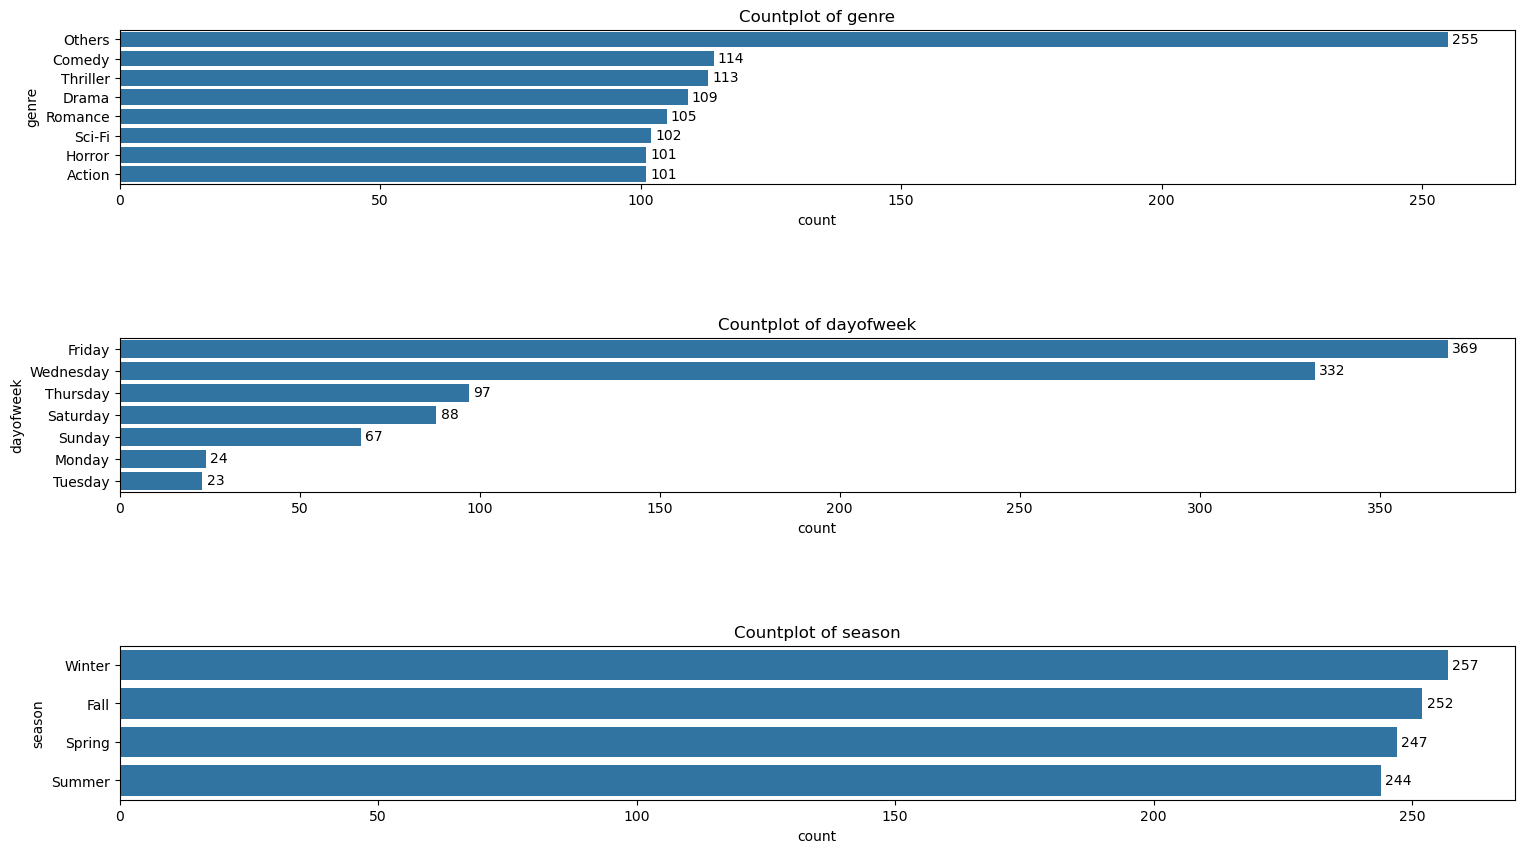

In [80]:
categorical_columns = data.select_dtypes(include='object').columns[:3]
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(18, 10))
axes = axes.flatten()
for i, col in enumerate(categorical_columns):
    sns.countplot(y=data[col], order=data[col].value_counts().index, ax=axes[i])
    for container in axes[i].containers:
        axes[i].bar_label(container, label_type='edge', fontsize=10, padding=3)
    axes[i].set_title(f"Countplot of {col}")
    
plt.subplots_adjust(hspace=1)
plt.show()

## Bivariate Analysis

Numerical Variables

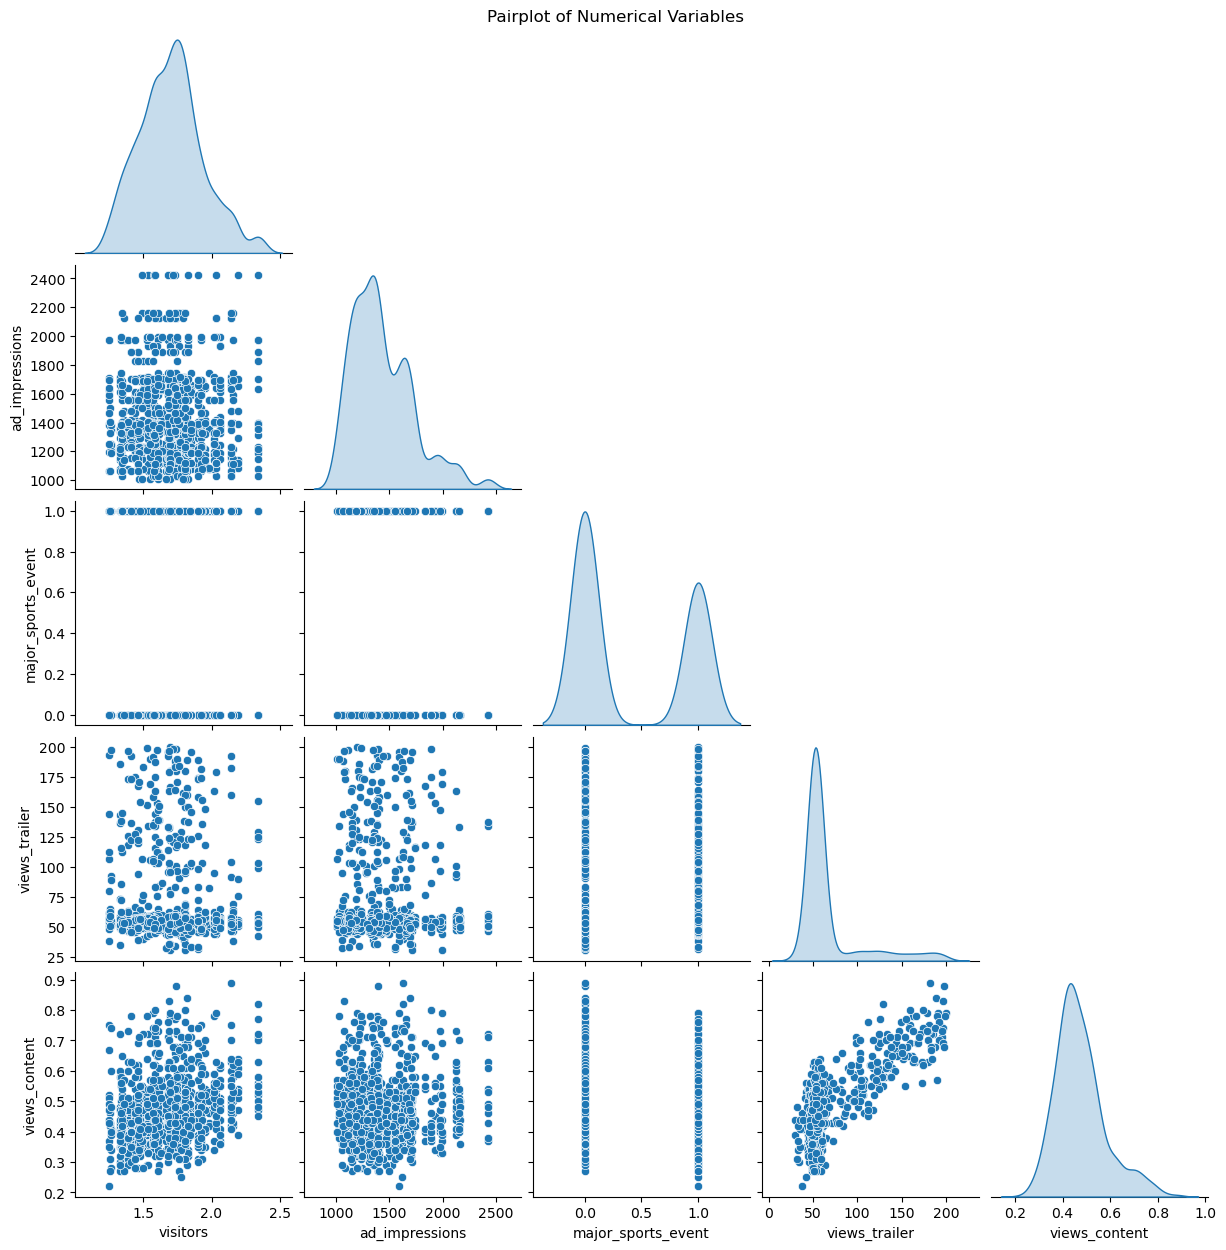

In [83]:
sns.pairplot(data.select_dtypes(include='number'),corner=True,diag_kind="kde")
plt.suptitle("Pairplot of Numerical Variables", y=1.0)
plt.show()

In [84]:
numerical_data = data.select_dtypes(include='number')
correlation_matrix = numerical_data.corr()
correlation_matrix

,visitors,ad_impressions,major_sports_event,views_trailer,views_content
visitors,1.000000,0.030472,-0.039494,-0.028930,0.259136
ad_impressions,0.030472,1.000000,-0.034371,0.009446,0.050022
major_sports_event,-0.039494,-0.034371,1.000000,0.048630,-0.236014
views_trailer,-0.028930,0.009446,0.048630,1.000000,0.753962
views_content,0.259136,0.050022,-0.236014,0.753962,1.000000


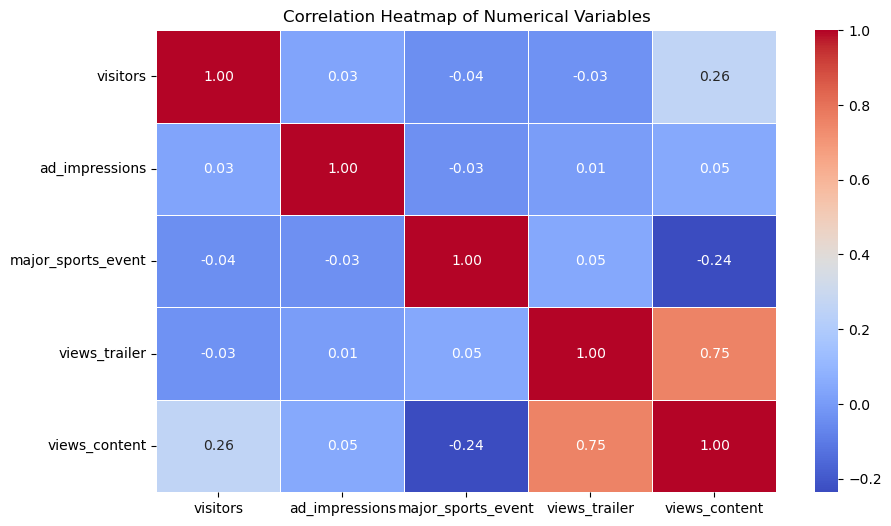

In [85]:
plt.figure(figsize=(10, 6))  
sns.heatmap(
    correlation_matrix,
    annot=True,          
    cmap='coolwarm',     
    fmt='.2f',           
    linewidths=0.5,      
    cbar=True          
)
plt.title("Correlation Heatmap of Numerical Variables")
plt.show()

## Graphs

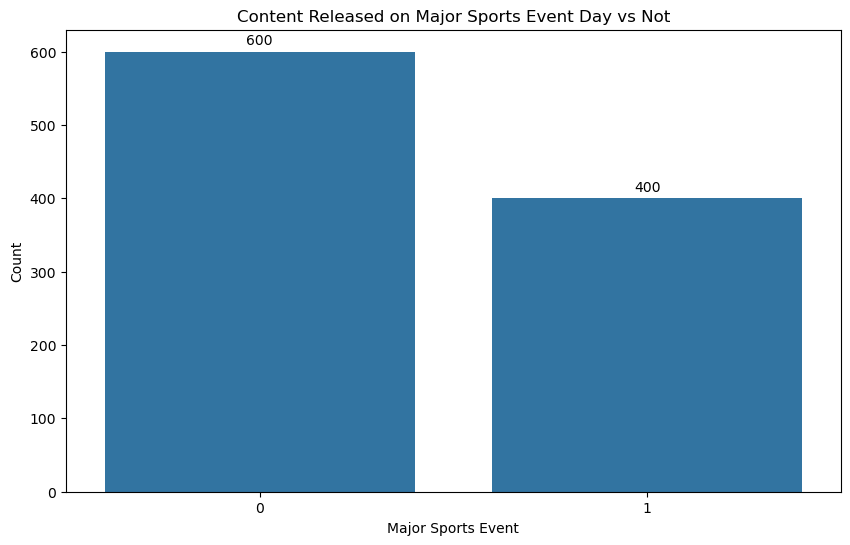

In [87]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='major_sports_event')
for container in plt.gca().containers:
    plt.bar_label(container, label_type='edge', fontsize=10, padding=3)
plt.title('Content Released on Major Sports Event Day vs Not')
plt.xlabel('Major Sports Event')
plt.ylabel('Count')
plt.show()

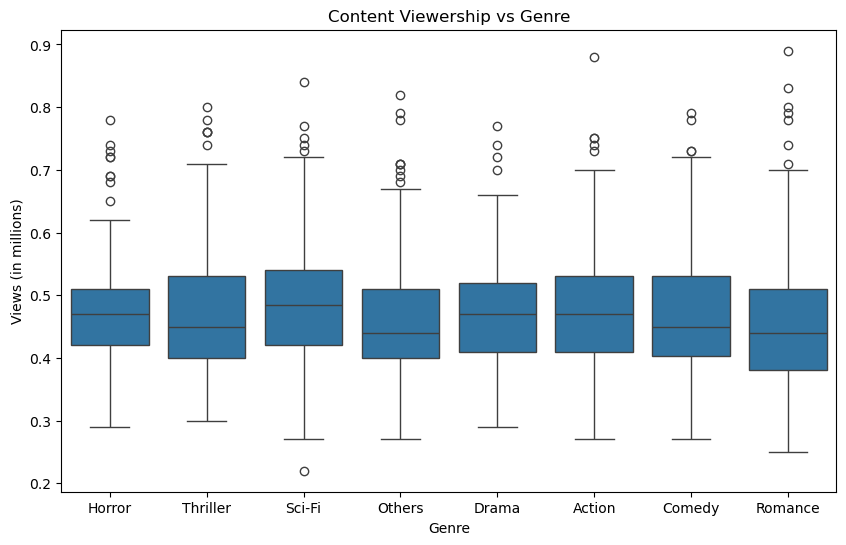

In [88]:
# Box plot for viewership varies with genre
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='genre', y='views_content')
plt.title('Content Viewership vs Genre')
plt.xlabel('Genre')
plt.ylabel('Views (in millions)')
plt.show()

## Questions

What does the distribution of content views look like?

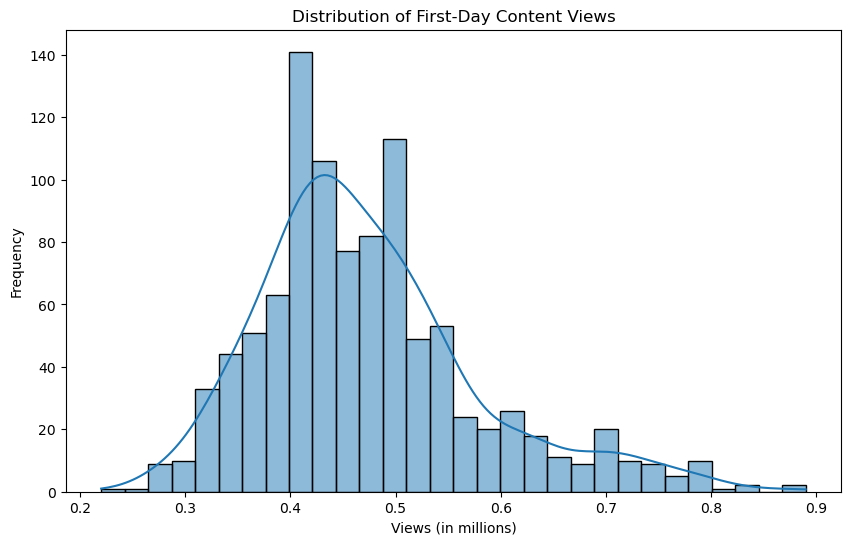

In [91]:
#Distribution of Content Views
plt.figure(figsize=(10, 6))
sns.histplot(data['views_content'], kde=True, bins=30)
plt.title('Distribution of First-Day Content Views')
plt.xlabel('Views (in millions)')
plt.ylabel('Frequency')
plt.show()

What does the distribution of genres look like?

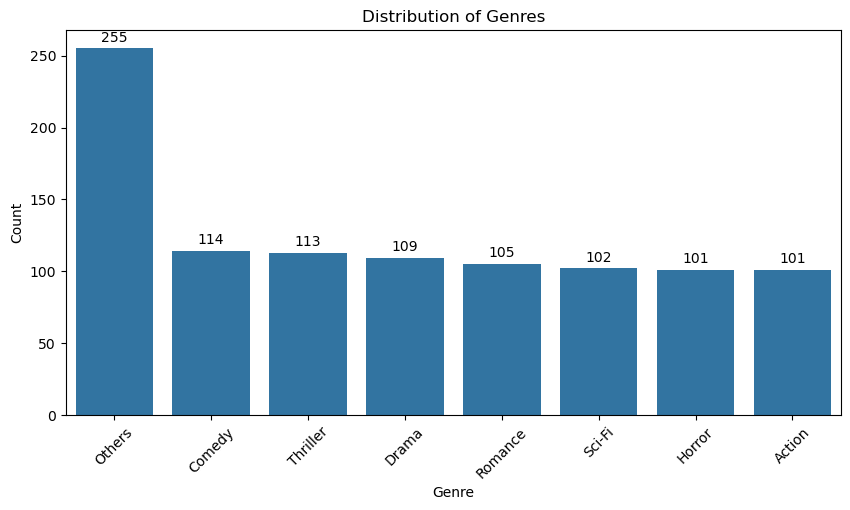

In [93]:
plt.figure(figsize=(10, 5))
sns.countplot(data=data, x='genre',order=data['genre'].value_counts().index)
for container in plt.gca().containers:
    plt.bar_label(container, label_type='edge', fontsize=10, padding=3)
plt.xlabel("Genre")
plt.ylabel("Count")
plt.title("Distribution of Genres")
plt.xticks(rotation=45)
plt.show()

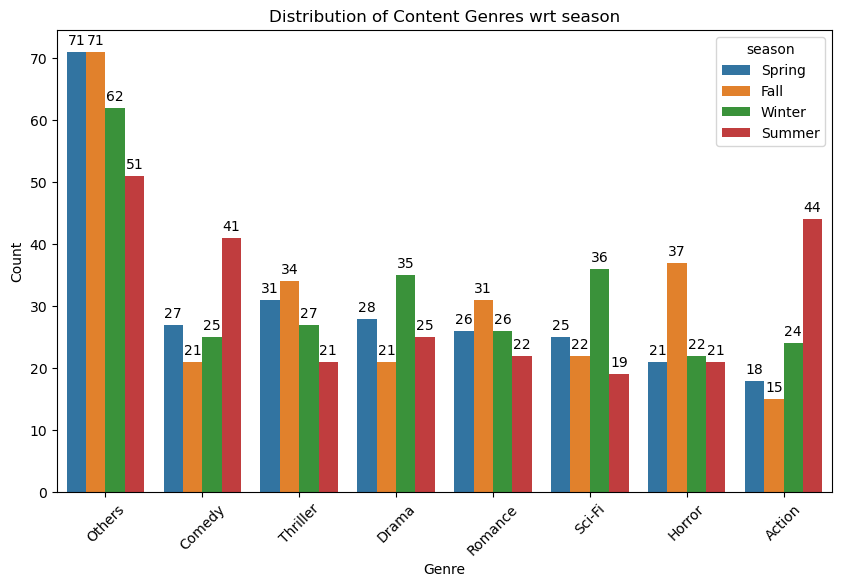

In [94]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='genre', hue="season",order=data['genre'].value_counts().index)
for container in plt.gca().containers:
    plt.bar_label(container, label_type='edge', fontsize=10, padding=3)
plt.title('Distribution of Content Genres wrt season')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


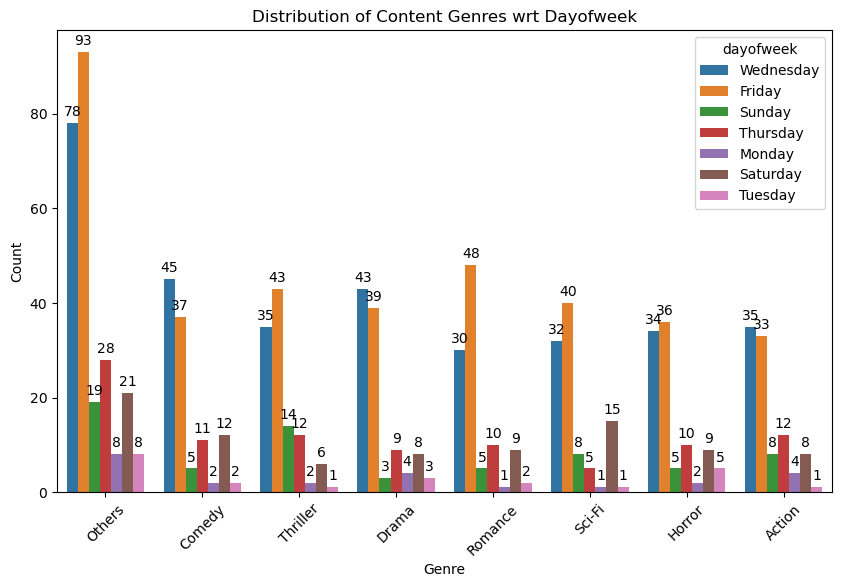

In [95]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='genre', hue="dayofweek",order=data['genre'].value_counts().index)
for container in plt.gca().containers:
    plt.bar_label(container, label_type='edge', fontsize=10, padding=3)
plt.title('Distribution of Content Genres wrt Dayofweek')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

The day of the week on which content is released generally plays a key role in the viewership. How does the viewership vary with the day of release?

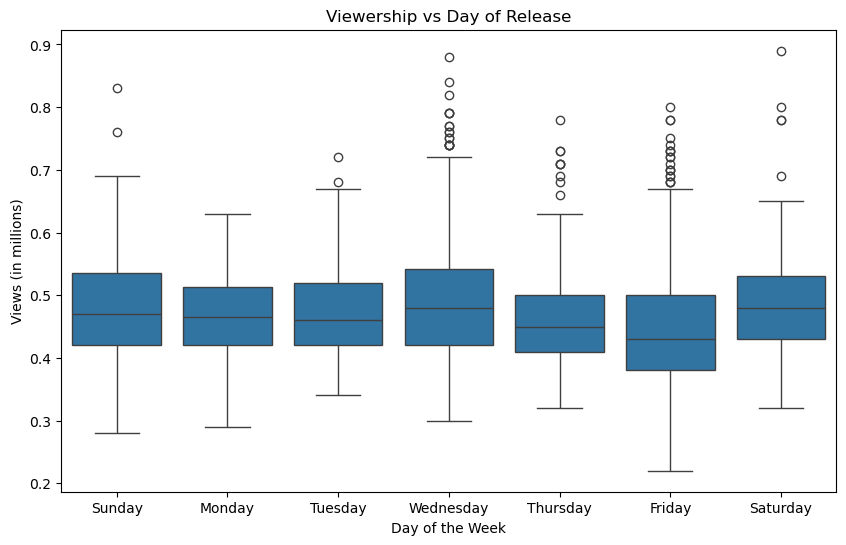

In [97]:
# Box plot for viewership varies with the day of the week
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='dayofweek', y='views_content',order=['Sunday', 'Monday', 'Tuesday','Wednesday','Thursday','Friday','Saturday'])
plt.title('Viewership vs Day of Release')
plt.xlabel('Day of the Week')
plt.ylabel('Views (in millions)')
plt.show()

How does the viewership vary with the season of release

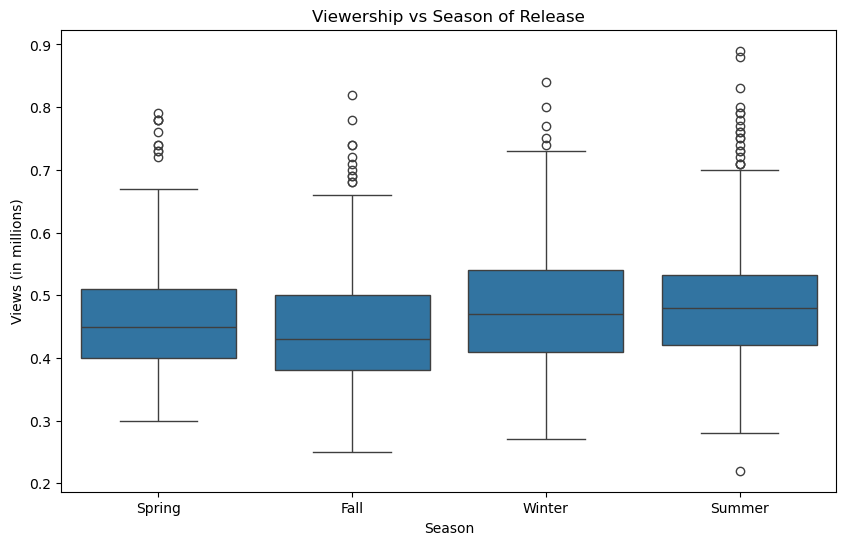

In [99]:
# Viewership vs Season of Release
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='season', y='views_content')
plt.title('Viewership vs Season of Release')
plt.xlabel('Season')
plt.ylabel('Views (in millions)')
plt.show()

What is the correlation between trailer views and content views?

Correlation coefficient : 0.7539622148205365


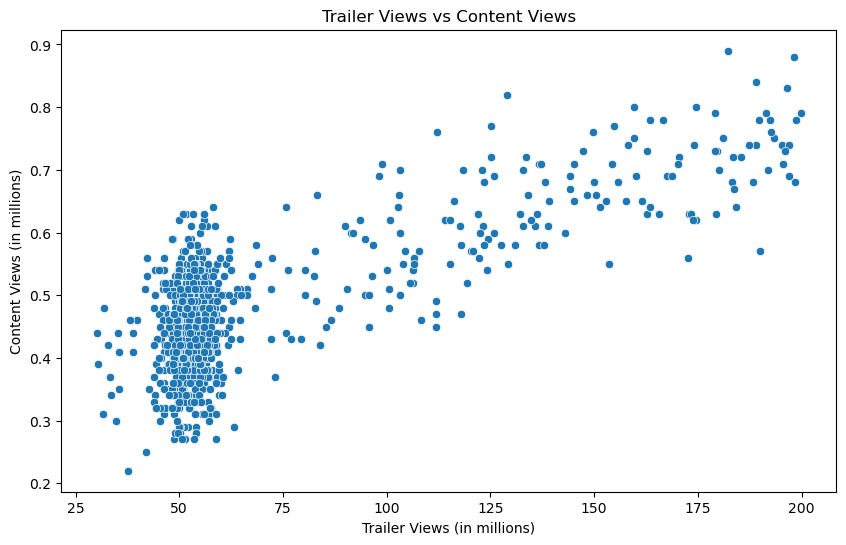

In [101]:
# Scatter plot for Trailer Views vs Content Views
print("Correlation coefficient :",data['views_trailer'].corr(data['views_content']))
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='views_trailer', y='views_content')
plt.title('Trailer Views vs Content Views')
plt.xlabel('Trailer Views (in millions)')
plt.ylabel('Content Views (in millions)')
plt.show()

# Data Preprocessing

Duplicate and Missing values

In [104]:
duplicate_rows = data[data.duplicated()]
print(f"Number of duplicate rows: {len(duplicate_rows)}")

#data = data.drop_duplicates()

Number of duplicate rows: 0


In [105]:
missing_values = data.isnull().sum()
print(f"Missing values per column:\n{missing_values}")

Missing values per column:
visitors              0
ad_impressions        0
major_sports_event    0
genre                 0
dayofweek             0
season                0
views_trailer         0
views_content         0
dtype: int64


Outlier detection and Treatment

In [107]:
for col in data.select_dtypes(include='number').columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    print(f"{col}: {len(outliers)} outliers detected")

visitors: 20 outliers detected
ad_impressions: 13 outliers detected
major_sports_event: 0 outliers detected
views_trailer: 189 outliers detected
views_content: 47 outliers detected


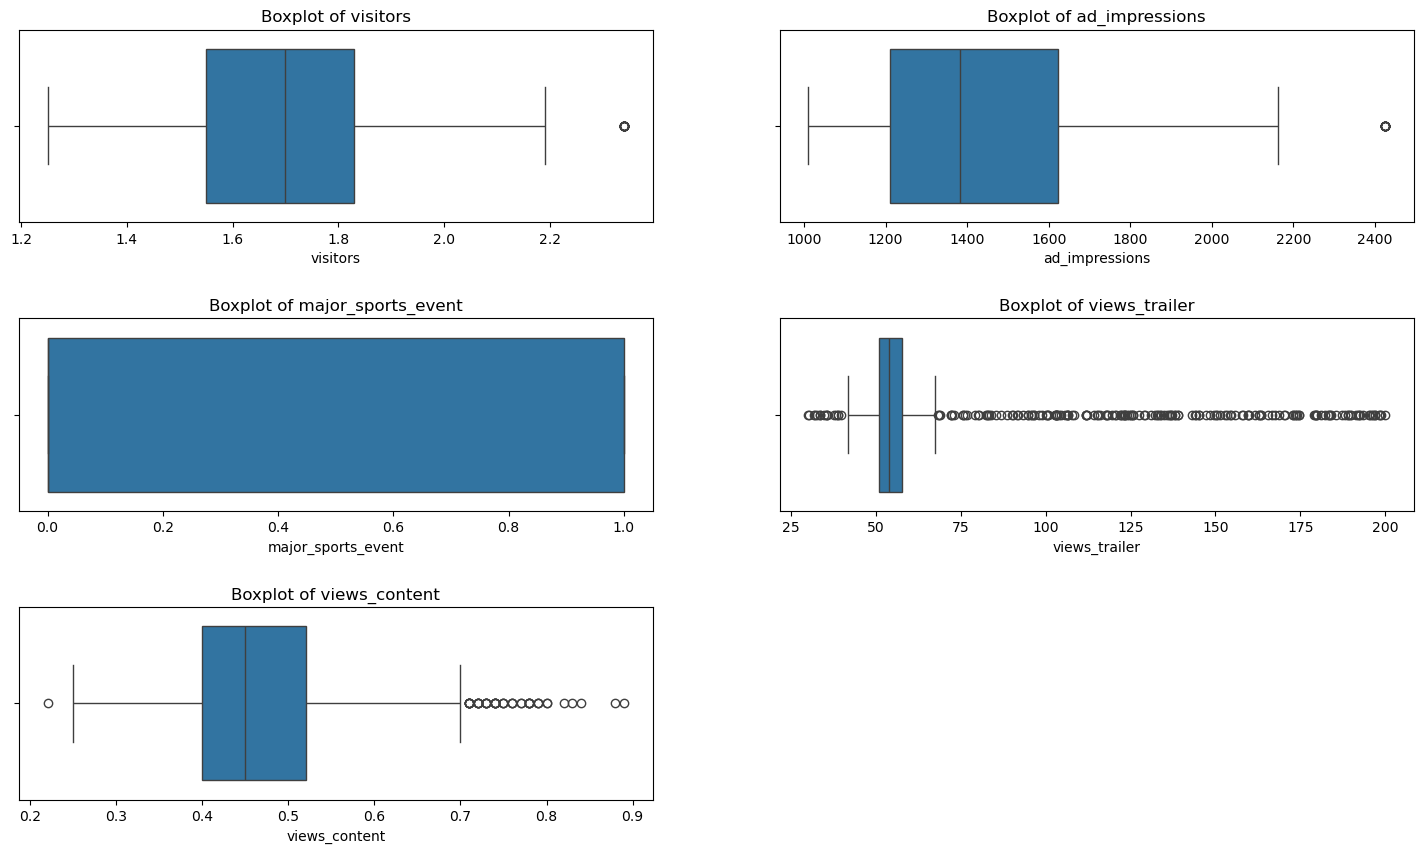

In [108]:
num_plots = min(5, len(numerical_columns))
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 10))
axes = axes.flatten()
for i in range(num_plots):
    col = numerical_columns[i]
    sns.boxplot(x=data[col], ax=axes[i])
    axes[i].set_title(f"Boxplot of {col}")
for i in range(num_plots, len(axes)):
    fig.delaxes(axes[i])

plt.subplots_adjust(hspace=0.5)
plt.show()

Feature Engineering

In [110]:
# Ratio of views_content to views_trailer
data['content_to_trailer_ratio'] = data['views_content'] / (data['views_trailer'] + 1e-6)

# Ad impressions per visitor
data['ad_per_visitor'] = data['ad_impressions'] / (data['visitors'] + 1e-6)

# Encoding categorical variables (One-Hot Encoding)
data = pd.get_dummies(data, columns=['genre', 'season', 'dayofweek', 'major_sports_event'], drop_first=True)
data.head()

,visitors,ad_impressions,views_trailer,views_content,content_to_trailer_ratio,ad_per_visitor,genre_Comedy,genre_Drama,genre_Horror,genre_Others,...,season_Spring,season_Summer,season_Winter,dayofweek_Monday,dayofweek_Saturday,dayofweek_Sunday,dayofweek_Thursday,dayofweek_Tuesday,dayofweek_Wednesday,major_sports_event_1
0,1.67,1113.81,56.70,0.51,0.008995,666.951696,False,False,True,False,...,True,False,False,False,False,False,False,False,True,False
1,1.46,1498.41,52.69,0.32,0.006073,1026.307516,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,1.47,1079.19,48.74,0.39,0.008002,734.142358,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
3,1.85,1342.77,49.81,0.44,0.008834,725.821229,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,1.46,1498.41,55.83,0.46,0.008239,1026.307516,False,False,False,False,...,False,False,True,False,False,True,False,False,False,False


In [111]:
data.columns

Index(['visitors', 'ad_impressions', 'views_trailer', 'views_content',
       'content_to_trailer_ratio', 'ad_per_visitor', 'genre_Comedy',
       'genre_Drama', 'genre_Horror', 'genre_Others', 'genre_Romance',
       'genre_Sci-Fi', 'genre_Thriller', 'season_Spring', 'season_Summer',
       'season_Winter', 'dayofweek_Monday', 'dayofweek_Saturday',
       'dayofweek_Sunday', 'dayofweek_Thursday', 'dayofweek_Tuesday',
       'dayofweek_Wednesday', 'major_sports_event_1'],
      dtype='object')

Data preparation for modeling

In [113]:
# defining X and y variables
X = data.drop(columns=['views_content'])  # Assuming 'views_content' is the target
y = data['views_content']

print(X.head())
print(y.head())

   visitors  ad_impressions  views_trailer  content_to_trailer_ratio  \
0      1.67         1113.81          56.70                  0.008995   
1      1.46         1498.41          52.69                  0.006073   
2      1.47         1079.19          48.74                  0.008002   
3      1.85         1342.77          49.81                  0.008834   
4      1.46         1498.41          55.83                  0.008239   

   ad_per_visitor  genre_Comedy  genre_Drama  genre_Horror  genre_Others  \
0      666.951696         False        False          True         False   
1     1026.307516         False        False         False         False   
2      734.142358         False        False         False         False   
3      725.821229         False        False         False         False   
4     1026.307516         False        False         False         False   

   genre_Romance  ...  season_Spring  season_Summer  season_Winter  \
0          False  ...           True    

In [114]:
# Add the intercept to data
X = sm.add_constant(X)

In [115]:
# converting the input attributes into float type for modeling
X = X.astype(float)
X.head()

,const,visitors,ad_impressions,views_trailer,content_to_trailer_ratio,ad_per_visitor,genre_Comedy,genre_Drama,genre_Horror,genre_Others,...,season_Spring,season_Summer,season_Winter,dayofweek_Monday,dayofweek_Saturday,dayofweek_Sunday,dayofweek_Thursday,dayofweek_Tuesday,dayofweek_Wednesday,major_sports_event_1
0,1.0,1.67,1113.81,56.70,0.008995,666.951696,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,1.46,1498.41,52.69,0.006073,1026.307516,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,1.47,1079.19,48.74,0.008002,734.142358,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,1.0,1.85,1342.77,49.81,0.008834,725.821229,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,1.46,1498.41,55.83,0.008239,1026.307516,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [116]:
# splitting the data in 70:30 ratio for train to test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 700
Number of rows in test data = 300


# Model building - Linear Regression

Train the model

In [119]:
X_train

,const,visitors,ad_impressions,views_trailer,content_to_trailer_ratio,ad_per_visitor,genre_Comedy,genre_Drama,genre_Horror,genre_Others,...,season_Spring,season_Summer,season_Winter,dayofweek_Monday,dayofweek_Saturday,dayofweek_Sunday,dayofweek_Thursday,dayofweek_Tuesday,dayofweek_Wednesday,major_sports_event_1
731,1.0,1.64,1992.53,49.62,0.008061,1214.956576,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
716,1.0,1.69,2158.03,132.93,0.005266,1276.940073,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
640,1.0,1.47,1229.35,54.13,0.007759,836.291948,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
804,1.0,1.49,1010.87,106.62,0.005159,678.435786,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
737,1.0,2.19,1119.90,52.04,0.011337,511.369630,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
767,1.0,1.57,1323.74,55.61,0.009171,843.145960,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
72,1.0,1.77,1700.04,54.98,0.009276,960.474034,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
908,1.0,1.54,1398.05,53.75,0.007814,907.824086,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
235,1.0,2.02,1284.86,94.84,0.006221,636.068992,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [120]:
olsmodel = sm.OLS(y_train, X_train).fit()
print(olsmodel.summary())

                            OLS Regression Results                            
Dep. Variable:          views_content   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     394.9
Date:                Sat, 08 Feb 2025   Prob (F-statistic):               0.00
Time:                        21:54:44   Log-Likelihood:                 1495.1
No. Observations:                 700   AIC:                            -2944.
Df Residuals:                     677   BIC:                            -2840.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [121]:
# To display coefficients with column names
coefficients = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': olsmodel.params})
print("\nModel Coefficients:")
coefficients


Model Coefficients:


,Feature,Coefficient
const,const,-0.262965
visitors,visitors,0.089928
ad_impressions,ad_impressions,-0.000050
views_trailer,views_trailer,0.003881
content_to_trailer_ratio,content_to_trailer_ratio,39.268667
ad_per_visitor,ad_per_visitor,0.000088
genre_Comedy,genre_Comedy,0.005504
genre_Drama,genre_Drama,0.010254
genre_Horror,genre_Horror,0.006999
genre_Others,genre_Others,0.004658


In [122]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [123]:
# checking model performance on train set
print("Training Performance\n")
olsmodel1_perf_train = model_performance_regression(olsmodel, X_train, y_train)
olsmodel1_perf_train

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.028585,0.019667,0.927703,0.925243,4.04905


In [124]:
# checking model performance on test set
print("Test Performance\n")
olsmodel1_perf_test = model_performance_regression(olsmodel, X_test, y_test)
olsmodel1_perf_test

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.036069,0.024198,0.88134,0.871452,4.920487


# Testing the assumptions of linear regression model

MULTICOLLINEARITY

In [127]:
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif
checking_vif(X_train)

,feature,VIF
0,const,941.121103
1,visitors,16.176316
2,ad_impressions,31.801598
3,views_trailer,2.852850
4,content_to_trailer_ratio,3.675638
5,ad_per_visitor,45.349930
6,genre_Comedy,1.920192
7,genre_Drama,1.928064
8,genre_Horror,1.910773
9,genre_Others,2.574680


In [128]:
def treating_multicollinearity(predictors, target, high_vif_columns):

    adj_r2 = []
    rmse = []

    for cols in high_vif_columns:
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        olsmodel = sm.OLS(target, train).fit()
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [129]:
col_list = ["ad_impressions","visitors","ad_per_visitor"]
res = treating_multicollinearity(X_train, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,ad_impressions,0.924871,0.029161
1,ad_per_visitor,0.924813,0.029172
2,visitors,0.922855,0.029549


In [130]:
col_to_drop = ["ad_per_visitor"]
for col in col_to_drop:
    X_train2 = X_train.loc[:, ~X_train.columns.str.startswith(col)]
    X_test2 = X_test.loc[:, ~X_test.columns.str.startswith(col)]

# Check VIF now
vif = checking_vif(X_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  ['ad_per_visitor']


,feature,VIF
0,const,139.707281
1,visitors,1.282755
2,ad_impressions,1.029631
3,views_trailer,2.852799
4,content_to_trailer_ratio,3.675614
5,genre_Comedy,1.918813
6,genre_Drama,1.927154
7,genre_Horror,1.905249
8,genre_Others,2.574163
9,genre_Romance,1.754643


In [131]:
cols = X_train2.columns.tolist()
max_p_value = 1
while len(cols) > 0:
    
    x_train_aux = X_train2[cols]

    model = sm.OLS(y_train, x_train_aux).fit()

    p_values = model.pvalues
    max_p_value = max(p_values)

    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'visitors', 'views_trailer', 'content_to_trailer_ratio', 'season_Summer', 'season_Winter', 'dayofweek_Monday', 'dayofweek_Saturday', 'dayofweek_Sunday', 'dayofweek_Thursday', 'dayofweek_Wednesday', 'major_sports_event_1']


In [132]:
X_train3 = X_train2[selected_features]
X_test3 = X_test2[selected_features]

In [133]:
olsmodel2 = sm.OLS(y_train, X_train3).fit()
print(olsmodel2.summary())

                            OLS Regression Results                            
Dep. Variable:          views_content   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     786.2
Date:                Sat, 08 Feb 2025   Prob (F-statistic):               0.00
Time:                        21:54:45   Log-Likelihood:                 1488.5
No. Observations:                 700   AIC:                            -2953.
Df Residuals:                     688   BIC:                            -2898.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

LINEARITY AND INDEPENDENCE

In [135]:
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmodel2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmodel2.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
731,0.40,0.418448,-0.018448
716,0.70,0.647475,0.052525
640,0.42,0.416235,0.003765
804,0.55,0.524635,0.025365
737,0.59,0.588346,0.001654


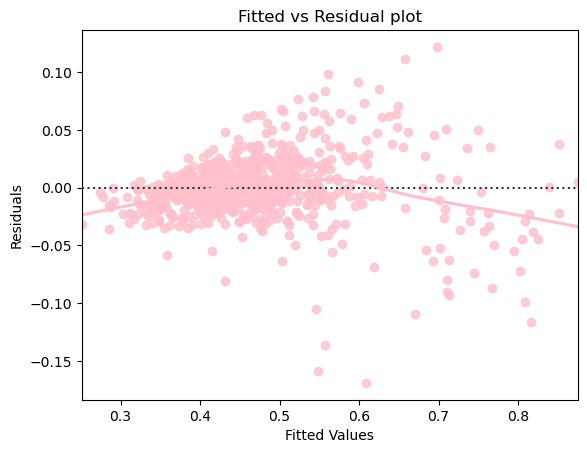

In [136]:
sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="pink", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

NORMALITY

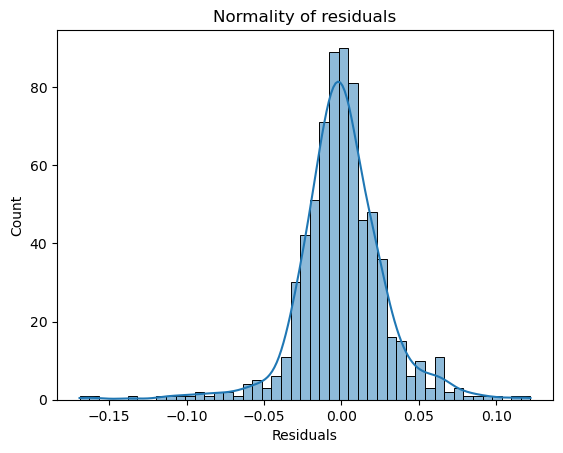

In [138]:
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

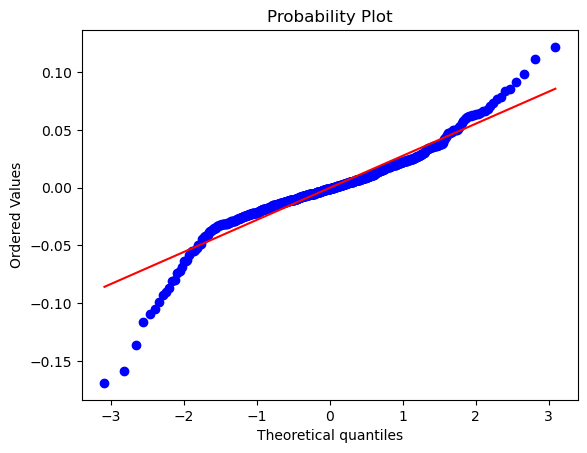

In [139]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

In [140]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9216209109466189, pvalue=1.3294500584587767e-18)

HOMOSCEDASTICITY

In [142]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], X_train3)
lzip(name, test)

[('F statistic', 1.0822768095980726), ('p-value', 0.2338634525925889)]

# Model Summary

In [144]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel2_perf_train = model_performance_regression(olsmodel2, X_train3, y_train)
olsmodel2_perf_train

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.028859,0.019676,0.92631,0.925023,4.038724


In [145]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel2_perf_test = model_performance_regression(olsmodel2, X_test3, y_test)
olsmodel2_perf_test

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.036424,0.024655,0.878994,0.873935,5.039697


In [146]:
# training performance comparison

models_train_comp_df = pd.concat(
    [olsmodel1_perf_train.T, olsmodel2_perf_train.T],
    axis=1,
)

models_train_comp_df.columns = [
    "Linear Regression (initial)",
    "Linear Regression (final)",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Linear Regression (initial),Linear Regression (final)
RMSE,0.028585,0.028859
MAE,0.019667,0.019676
R-squared,0.927703,0.926310
Adj. R-squared,0.925243,0.925023
MAPE,4.049050,4.038724


In [147]:
# test performance comparison

models_test_comp_df = pd.concat(
    [olsmodel1_perf_test.T, olsmodel2_perf_test.T],
    axis=1,
)

models_test_comp_df.columns = [
    "Linear Regression (initial)",
    "Linear Regression (final)",
]

print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


,Linear Regression (initial),Linear Regression (final)
RMSE,0.036069,0.036424
MAE,0.024198,0.024655
R-squared,0.881340,0.878994
Adj. R-squared,0.871452,0.873935
MAPE,4.920487,5.039697


In [148]:
olsmodel_final = sm.OLS(y_train, X_train3).fit()
print(olsmodel_final.summary())

                            OLS Regression Results                            
Dep. Variable:          views_content   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     786.2
Date:                Sat, 08 Feb 2025   Prob (F-statistic):               0.00
Time:                        21:54:45   Log-Likelihood:                 1488.5
No. Observations:                 700   AIC:                            -2953.
Df Residuals:                     688   BIC:                            -2898.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   